## Task: Predict number of bikers on a given day using linear regression

You are provided with a dataset about Seattle's Fremont Bridge in the form of a csv file.
The data contains different details about a given day, like weather, temperature and other factors (see the dataframe preview below) for more details. The data also contains how many bikers were observed crossing the brudge that day.

You are provided with the code to download and load the csv file.

Your task is to train a linear regression model which takes in the parameters of the day (you can drop the columns that you think you don't need) and predicts the number of bikers according to those parameters.

You can find more details about the data: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.


- For better enhancements of the skills, try changing some integers to strings and you may make some cells null.
- Then, Solve by starting doing the preprocessing (fixing labels and missing cells).

In [1]:
from IPython.display import clear_output

In [2]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install gdown
%pip install pandas
%pip install numpy

clear_output()

In [4]:
# Download the CSV file.
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip
!rm hour.csv

--2025-01-05 23:04:35--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip.1’

bike+sharing+datase     [  <=>               ] 273.43K  1.09MB/s    in 0.2s    

2025-01-05 23:04:35 (1.09 MB/s) - ‘bike+sharing+dataset.zip.1’ saved [279992]

Archive:  bike+sharing+dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: hour.csv                


In [36]:
import pandas as pd
import numpy as np


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('day.csv')

In [9]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


if we noticed that we have the dt culmn and the

In [10]:
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


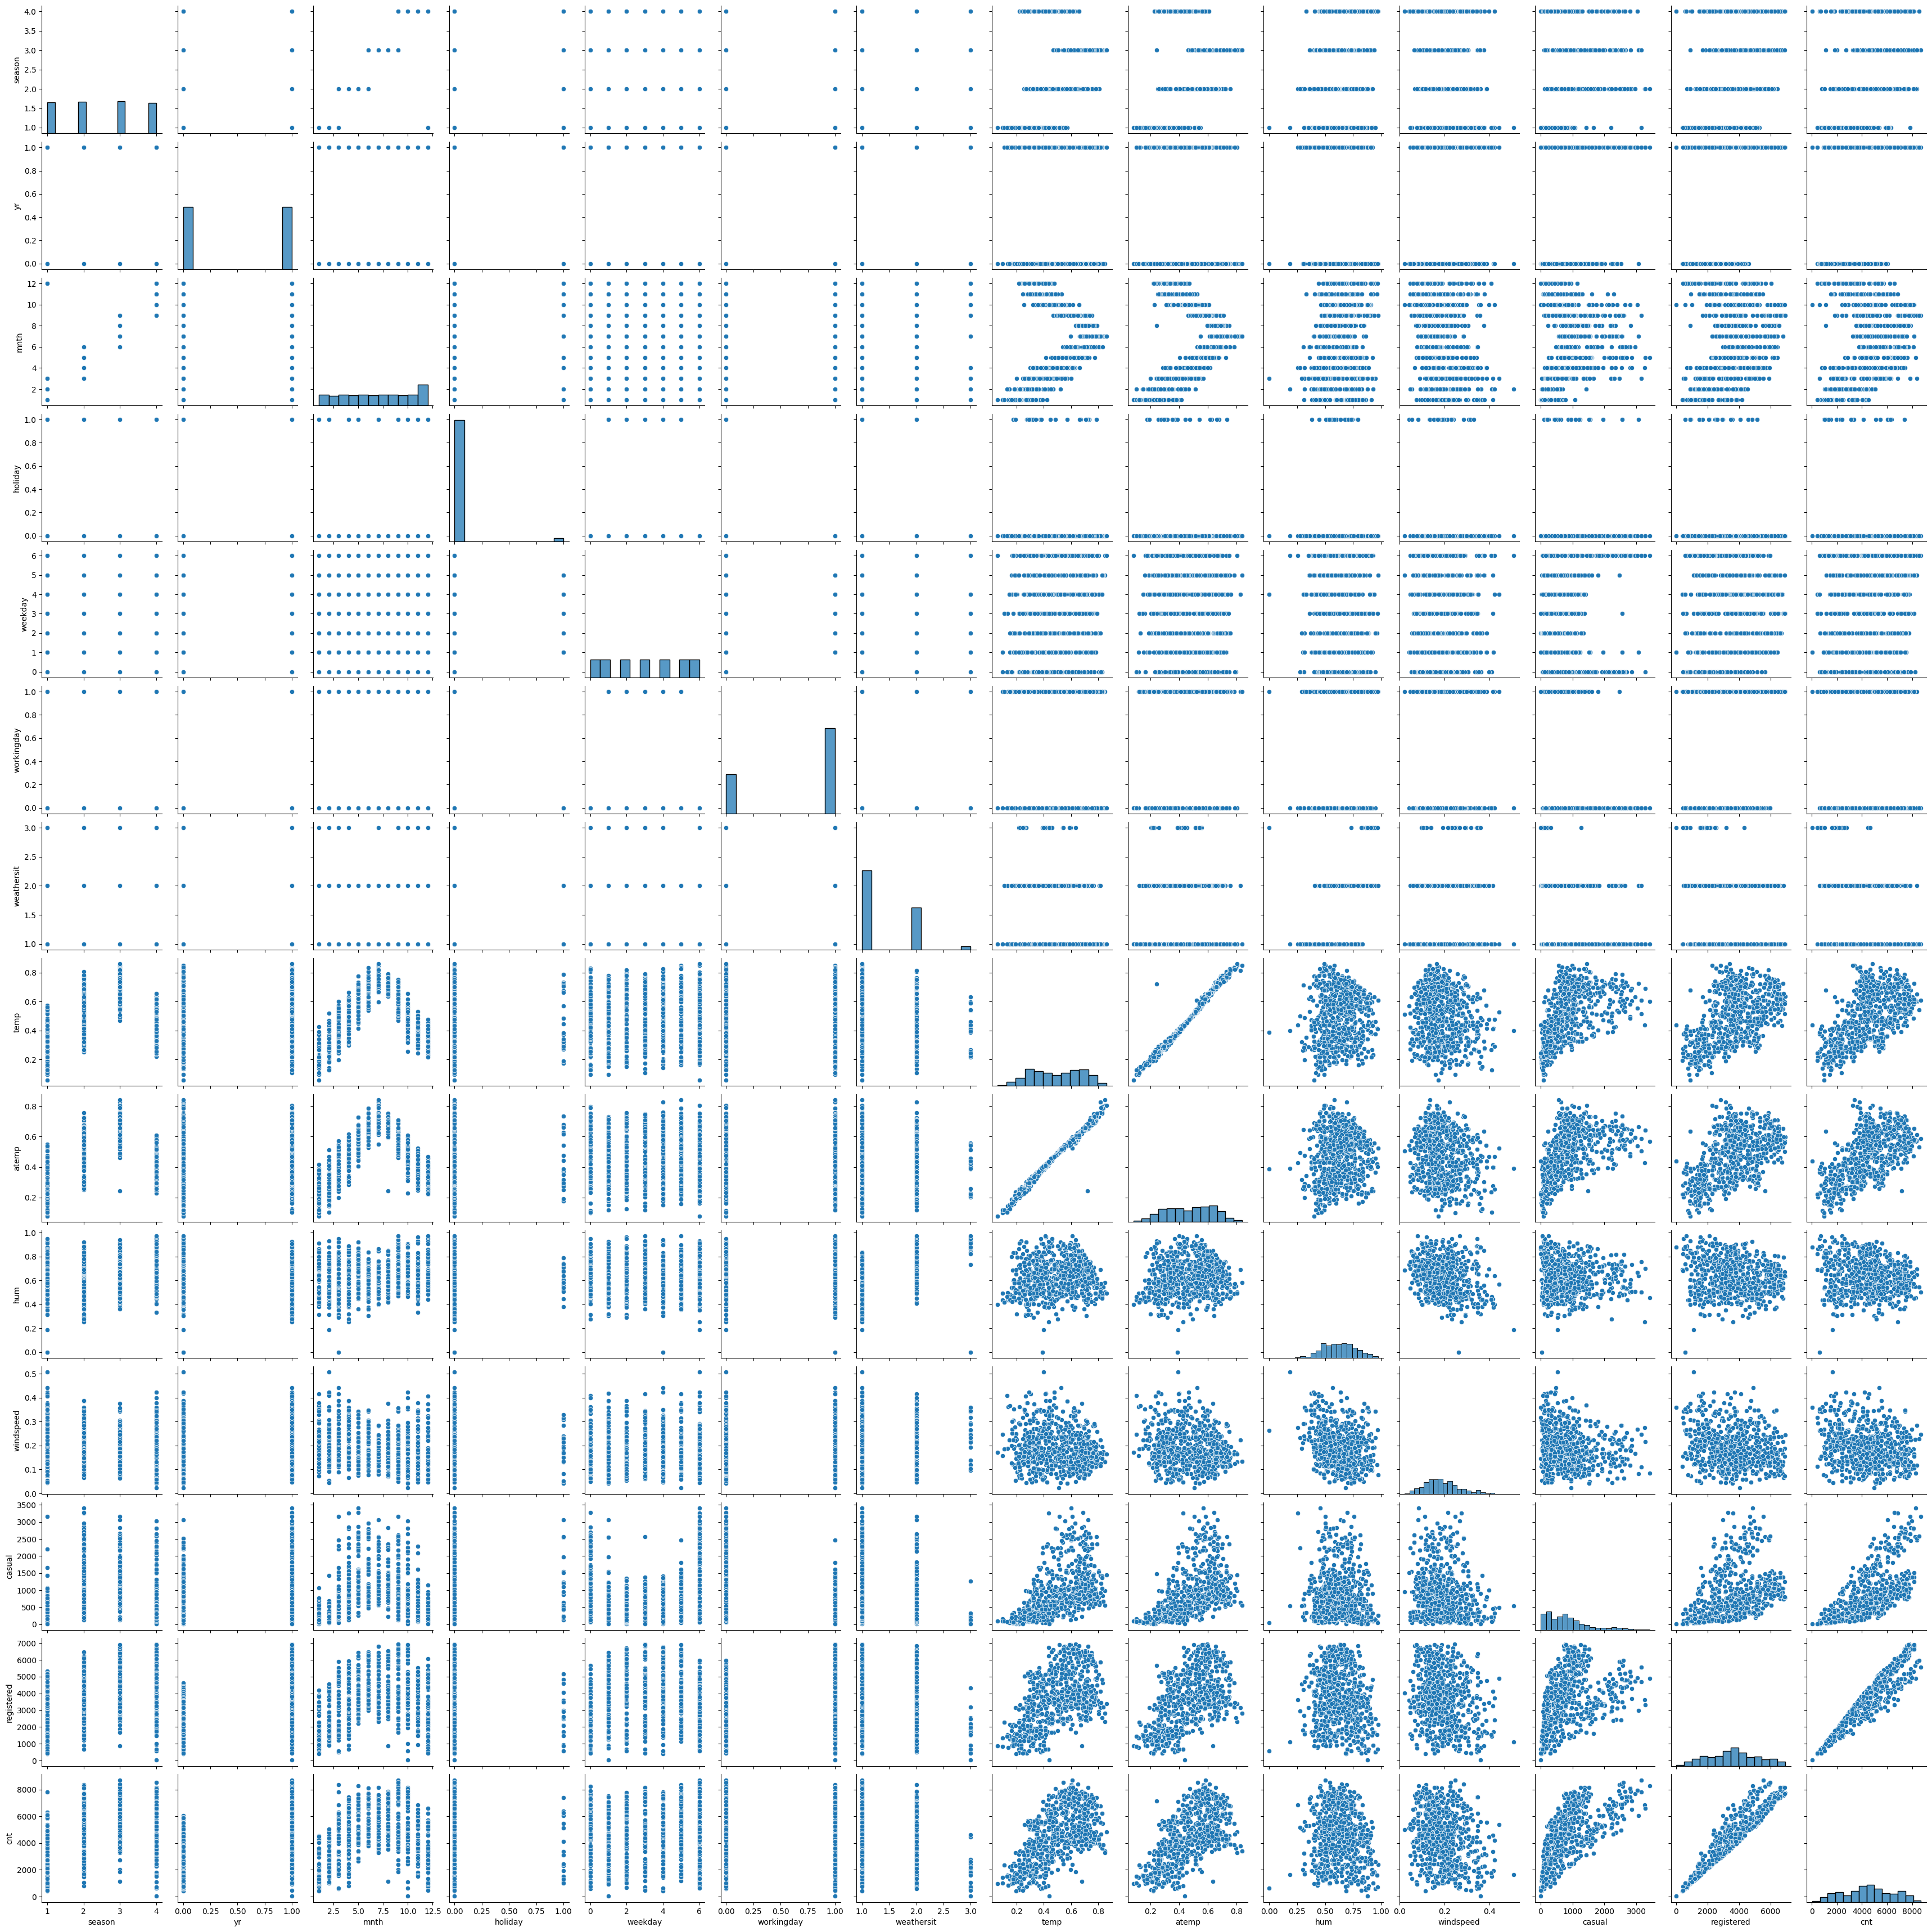

In [37]:
sns.pairplot(df)

we noticed that the instan It is just a serial numbers will not be usful for the realtionship with predicting the number of bikers

also
dteday It is a date in string format and is already represented in other columns are season, mnth, weekday
so i will drop them

In [12]:
df = df.drop(['instant', 'dteday'], axis=1)

In [13]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [23]:
y = df['cnt'] #my y is the number of bikers
X=df.drop('cnt',axis=1)#this is the rest futears expt cnt

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [34]:
model=LinearRegression()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print("R^2 Score:", r2)



1.523004099770785e-24
R^2 Score: 1.0


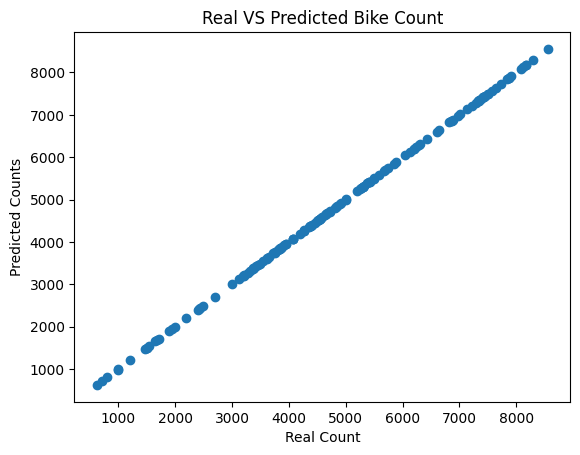

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real Count")
plt.ylabel("Predicted Counts")
plt.title("Real VS Predicted Bike Count")
plt.show()